#### 1. Reading and Exploring data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data.csv', on_bad_lines='skip')

In [3]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[ data['password'].isna() ]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

<Axes: xlabel='strength', ylabel='count'>

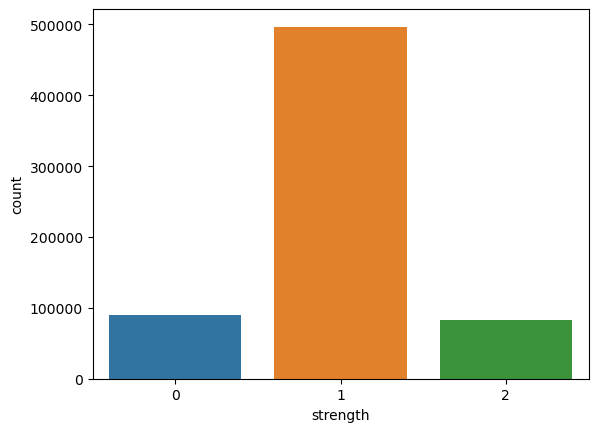

In [8]:
sns.countplot(data=data, x='strength')

--> We can infer from above figure that, class imbalance exist in dataset

In [9]:
password_tuple = np.array(data)

In [10]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
import random
random.shuffle(password_tuple)

In [12]:
# x = password_tuple[:,0]
# y = password_tuple[:,1]

In [13]:
x = [x[0] for x in password_tuple]
y = [x[1] for x in password_tuple]

In [14]:
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'kzde5577',
 'megzy123',
 'lamborghin1',
 'visi7k1yr',
 'v1118714',
 'lamborghin1',
 'megzy123',
 'universe2908',
 'kzde5577',
 'v1118714',
 'megzy123',
 'as326159',
 'universe2908',
 '52558000aaa',
 '612035180tok',
 'asv5o9yu',
 'lamborghin1',
 'sbl571017',
 'g067057895',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'lamborghin1',
 '612035180tok',
 'asv5o9yu',
 'u6c8vhow',
 'g067057895',
 'jytifok873',
 'universe2908',
 '52558000aaa',
 'universe2908',
 'intel1',
 'jerusalem393',
 'u6c8vhow',
 'fahad123',
 'elyass15@ajilent-ci',
 'faranumar91',
 'idofo673',
 'u6c8vhow',
 '52558000aaa',
 'trabajonet9',
 'universe2908',
 'intel1',
 'pHyqueDIyNQ8vmhb',
 'jytifok873',
 'u6c8vhow',
 'prisonbreak1',
 'go7kew7a2po',
 'g067057895',
 'openup12',
 'lamborghin1',
 'trabajonet9',
 'yk530mg8',
 'trabajonet9',
 'c3h8bkzr',
 'tamanagung6',
 'as326159',
 'sbl571017',
 '0169395484a',
 'asgaliu11',
 'yitbos77',
 'b4NbTxDEyNgG141J',
 'patri1973',
 'lamborghin1',

#### Text Representation using TF-IDF

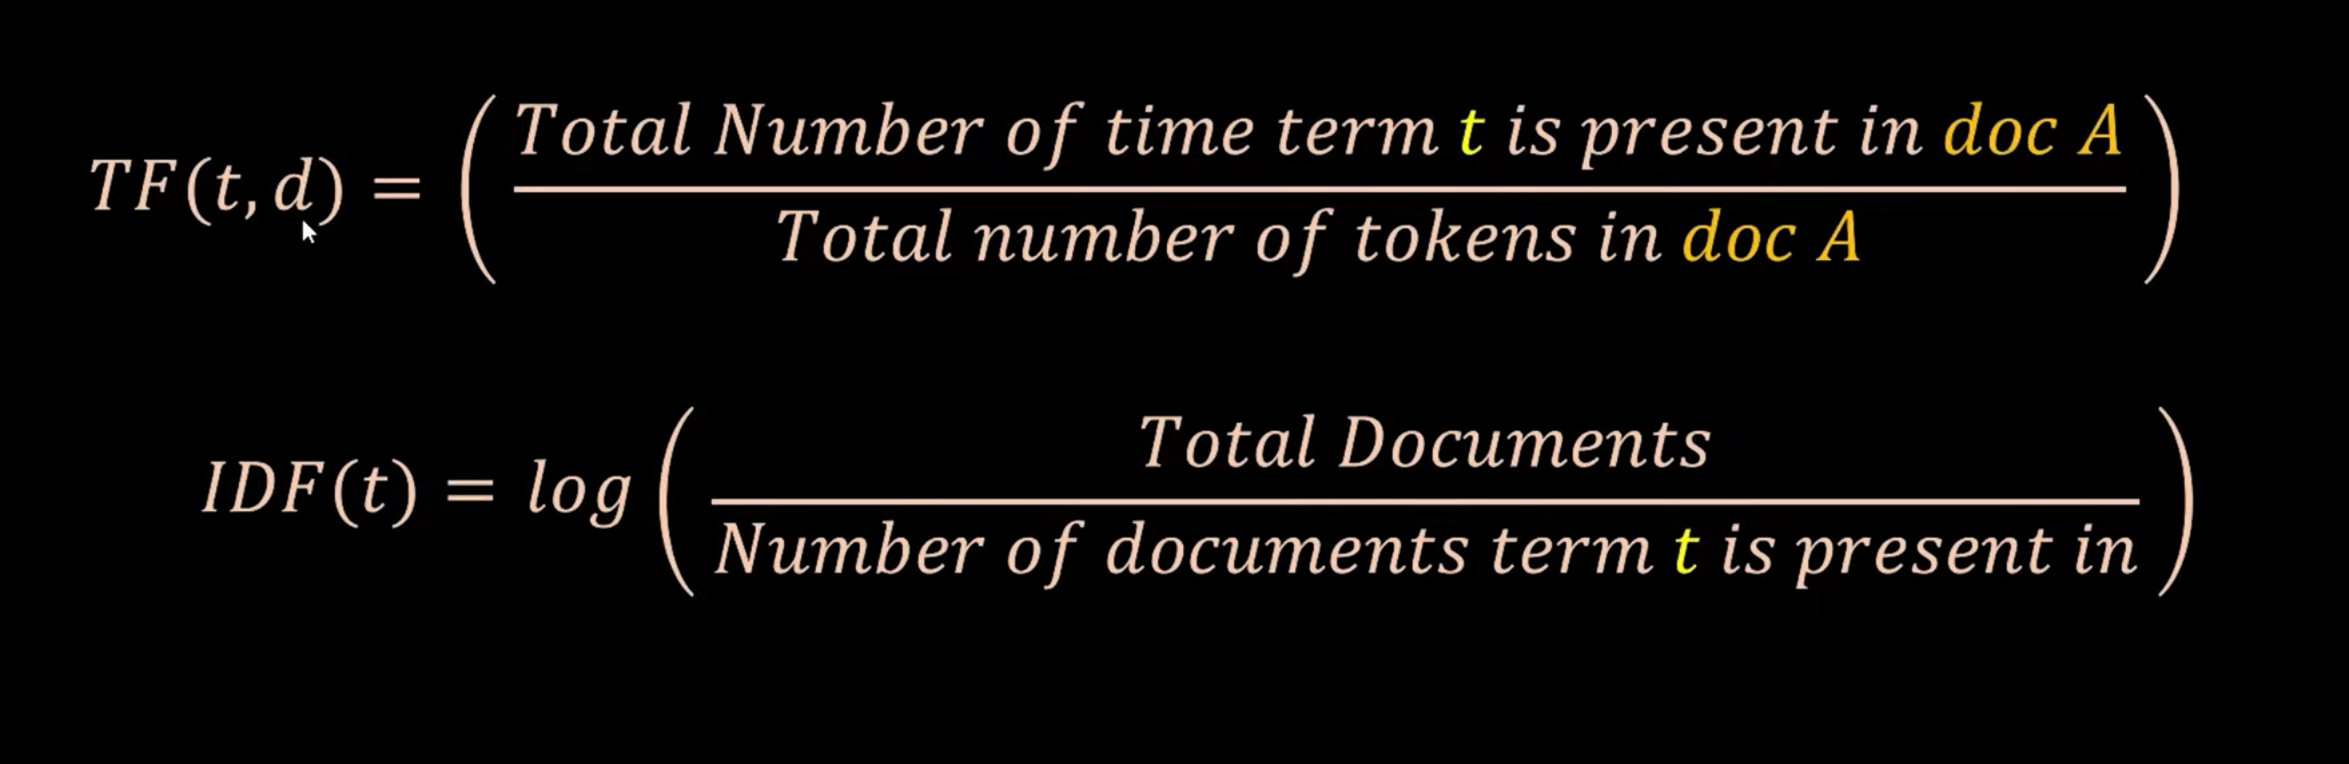

Term Frequency (TF) = bag of words value/total number of tokens in document

[Refer this video for detailed explanation](https://www.youtube.com/watch?v=ATK6fm3cYfI&t=745s&ab_channel=codebasics)

#### Limitations

1. As no. of words increases, dimensionality, sparsity increases
2. Does not capture relationship between words (Word embeddings solve this problem)
3. Does not address out of vocabulary problem

#### 2. Applying TF-IDF 

In [15]:
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kino3434',
 'kzde5577',
 'megzy123',
 'lamborghin1',
 'visi7k1yr',
 'v1118714',
 'lamborghin1',
 'megzy123',
 'universe2908',
 'kzde5577',
 'v1118714',
 'megzy123',
 'as326159',
 'universe2908',
 '52558000aaa',
 '612035180tok',
 'asv5o9yu',
 'lamborghin1',
 'sbl571017',
 'g067057895',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'lamborghin1',
 '612035180tok',
 'asv5o9yu',
 'u6c8vhow',
 'g067057895',
 'jytifok873',
 'universe2908',
 '52558000aaa',
 'universe2908',
 'intel1',
 'jerusalem393',
 'u6c8vhow',
 'fahad123',
 'elyass15@ajilent-ci',
 'faranumar91',
 'idofo673',
 'u6c8vhow',
 '52558000aaa',
 'trabajonet9',
 'universe2908',
 'intel1',
 'pHyqueDIyNQ8vmhb',
 'jytifok873',
 'u6c8vhow',
 'prisonbreak1',
 'go7kew7a2po',
 'g067057895',
 'openup12',
 'lamborghin1',
 'trabajonet9',
 'yk530mg8',
 'trabajonet9',
 'c3h8bkzr',
 'tamanagung6',
 'as326159',
 'sbl571017',
 '0169395484a',
 'asgaliu11',
 'yitbos77',
 'b4NbTxDEyNgG141J',
 'patri1973',
 'lamborghin1',

In [16]:
def word_divide_char(inputs):
    char=[]
    for i in inputs:
        char.append(i)
    return char

In [17]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer(tokenizer = word_divide_char)

In [20]:
X = vectorizer.fit_transform(x)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
X

<669639x135 sparse matrix of type '<class 'numpy.float64'>'
	with 5643417 stored elements in Compressed Sparse Row format>

In [22]:
X.shape

(669639, 135)

In [23]:
vectorizer.get_feature_names_out()

array(['\x05', '\x06', '\x0f', '\x10', '\x11', '\x12', '\x16', '\x17',
       '\x19', '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xa0', '¡', '¢', '¤',
       '¦', '¨', '«', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º',
       '¼', '¾', '¿', 'ß', 'à', 'á', 'â', 'ä', 'å', 'æ', 'ç', 'è', 'é',
       'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú',
       'û', 'ü', 'ý', 'þ', 'ÿ', 'œ', 'ƒ', '—', '‚', '‡', '‹', '›', '™'],
      dtype=object)

In [24]:
first_document_vector = X[0]
first_document_vector

<1x135 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [25]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56680217],
        [0.        ],
        [0.59160299],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [26]:
df = pd.DataFrame(data =first_document_vector.T.todense(), index=vectorizer.get_feature_names_out(), columns=['TF-IDF'])

In [27]:
df.sample(10)

,TF-IDF
7,0.591603
a,0.000000
á,0.000000
$,0.000000
à,0.000000
,0.000000
-,0.000000
¨,0.000000
i,0.000000
¿,0.000000


In [28]:
df.sort_values(by='TF-IDF',ascending=False)

,TF-IDF
7,0.591603
5,0.566802
z,0.335973
k,0.291765
d,0.285920
...,...
?,0.000000
>,0.000000
=,0.000000
<,0.000000


#### Linear Regression Drawbacks:

1. Deviated by outliers
2. Most of the time, I am getting output >1 or < 0, here my Linear Regression get struck 

#### Logistic Regression

1. Uses sigmoid function which converts output range to [0,1]

#### 3. Applying ML Algorithm On Data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X

<669639x135 sparse matrix of type '<class 'numpy.float64'>'
	with 5643417 stored elements in Compressed Sparse Row format>

In [31]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
X_train

<535711x135 sparse matrix of type '<class 'numpy.float64'>'
	with 4513694 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [36]:
clf.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [37]:
dt = np.array(['%@123abcd'])
pred = vectorizer.transform(dt)

In [38]:
clf.predict(pred)

array([1])

In [40]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

#### 4. Checking Accuracy of Model

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
cm = confusion_matrix(y_test, y_pred)

In [43]:
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 5419 12574    19]
 [ 3855 92947  2438]
 [   36  5119 11521]]
0.8204931007705633


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     18012
           1       0.84      0.94      0.89     99240
           2       0.82      0.69      0.75     16676

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



precison = TP/TP+FP

recall = TP/TP+FN